In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import linprog

In [2]:
costs = [30, 70, 30, 3, 10, 30]

data = {
    'Молоко (л.)': [720, 344, 18, 0.2, costs[0], 10, 24, 6],
    'Мясо (кг.)': [107, 1460, 151, 10.1, costs[1], 20, 27, 1],
    'Яйца (дес.)': [7080, 1040, 78, 13.2, costs[2], 120, 0, 0.25],
    'Хлеб (100 гр.)': [0, 75, 2.5, 0.75, costs[3], 0, 15, 10],
    'Овощи (100 гр.)': [134, 17.4, 0.2, 0.15, costs[4], 0, 1.1, 10],
    'Апельс. сок (литр)': [1000, 240, 4, 1.2, costs[5], 0, 52, 4],
}

min_values = [5000, 2500, 63, 12.5]

index = [
    'Витамин А',
    'Калории',
    'Протеин',
    'Железо',
    'Стоимость',
    'Холестерин',
    'Углеводы',
    'Макс. потребление'
]

df = pd.DataFrame(data, index=index)
df

,Молоко (л.),Мясо (кг.),Яйца (дес.),Хлеб (100 гр.),Овощи (100 гр.),Апельс. сок (литр)
Витамин А,720.0,107.0,7080.00,0.00,134.00,1000.0
Калории,344.0,1460.0,1040.00,75.00,17.40,240.0
Протеин,18.0,151.0,78.00,2.50,0.20,4.0
Железо,0.2,10.1,13.20,0.75,0.15,1.2
Стоимость,30.0,70.0,30.00,3.00,10.00,30.0
Холестерин,10.0,20.0,120.00,0.00,0.00,0.0
Углеводы,24.0,27.0,0.00,15.00,1.10,52.0
Макс. потребление,6.0,1.0,0.25,10.00,10.00,4.0


In [3]:
# целевые функции
price = df.loc[index[4]].values
cholesterol = df.loc[index[5]].values
carbonates = df.loc[index[6]].values

# общие ограничения
general_bounds = np.array([
    df.loc[index[0]].values,
    df.loc[index[1]].values,
    df.loc[index[2]].values,
    df.loc[index[3]].values,
]) * -1
# правая часть общих ограничений
free_bounds = np.array(min_values) * -1

# ограничения переменных
vars_bounds = list(zip([0] * df.loc[index[-1]].size, df.loc[index[-1]].values))

In [4]:
method = "simplex"

In [5]:
def calculate_simplex(c, A_ub, b_ub, bounds, method):
    f = linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method=method)

    print(f)
    coefs = np.array(f['x'])

    print()
    print('цена:', np.dot(coefs, price))
    print('холестерин:', np.dot(coefs, cholesterol))
    print('углеводы:', np.dot(coefs, carbonates))
    return f

In [6]:
f1 = calculate_simplex(c=price, A_ub=general_bounds, b_ub=free_bounds, bounds=vars_bounds, method=method)
coefs1 = np.array(f1['x'])

     con: array([], dtype=float64)
     fun: 167.685105136929
 message: 'Optimization terminated successfully.'
     nit: 20
   slack: array([ 0.        ,  0.        , 69.45825199,  7.14539294])
  status: 0
 success: True
       x: array([ 0.        ,  0.49835462,  0.25      , 10.        ,  0.        ,
        3.17667606])

цена: 167.685105136929
холестерин: 39.96709242010151
углеводы: 328.6427296558648


In [7]:
f2 = calculate_simplex(c=cholesterol, A_ub=general_bounds, b_ub=free_bounds, bounds=vars_bounds, method=method)
coefs2 = np.array(f2['x'])

     con: array([], dtype=float64)
     fun: 8.438356164383558
 message: 'Optimization terminated successfully.'
     nit: 21
   slack: array([385.14520548,   0.        ,  43.70958904,   5.56136986])
  status: 0
 success: True
       x: array([ 0.        ,  0.42191781,  0.        , 10.        , 10.        ,
        4.        ])

цена: 279.5342465753424
холестерин: 8.438356164383558
углеводы: 380.3917808219178


In [8]:
f3 = calculate_simplex(c=carbonates, A_ub=general_bounds, b_ub=free_bounds, bounds=vars_bounds, method=method)
coefs3 = np.array(f3['x'])

     con: array([], dtype=float64)
     fun: 93.34374088123724
 message: 'Optimization terminated successfully.'
     nit: 19
   slack: array([ 9.09494702e-13, -4.54747351e-13,  1.28189276e+02,  1.13780984e+00])
  status: 0
 success: True
       x: array([ 2.50232455,  0.8254797 ,  0.25      ,  0.        , 10.        ,
        0.        ])

цена: 240.3533150892357
холестерин: 71.53283937570485
углеводы: 93.34374088123724


In [9]:
results = np.array([
    np.array([np.dot(coefs1, price), np.dot(coefs1, cholesterol), np.dot(coefs1, carbonates)]),
    np.array([np.dot(coefs2, price), np.dot(coefs2, cholesterol), np.dot(coefs2, carbonates)]),
    np.array([np.dot(coefs3, price), np.dot(coefs3, cholesterol), np.dot(coefs3, carbonates)]),
])

objectives = [price, cholesterol, carbonates]
alphas = [0.3, 0.2, 0.5]

print(results)

[[167.68510514  39.96709242 328.64272966]
 [279.53424658   8.43835616 380.39178082]
 [240.35331509  71.53283938  93.34374088]]


In [10]:
final_criteria = np.array([
    np.array(alphas[index] * objectives[index] / arr.max()) for index, arr in enumerate(results.T)
])

final = final_criteria.sum(axis=0)

In [11]:
f4 = calculate_simplex(c=final, A_ub=general_bounds, b_ub=free_bounds, bounds=vars_bounds, method=method)
coefs4 = np.array(f4['x'])

     con: array([], dtype=float64)
     fun: 0.5759055717968709
 message: 'Optimization terminated successfully.'
     nit: 21
   slack: array([  0.        ,   0.        , 122.68392523,   4.52938318])
  status: 0
 success: True
       x: array([0.17803738, 1.        , 0.25      , 0.        , 0.        ,
       2.99481308])

цена: 172.68551401869155
холестерин: 51.7803738317757
углеводы: 187.00317757009347


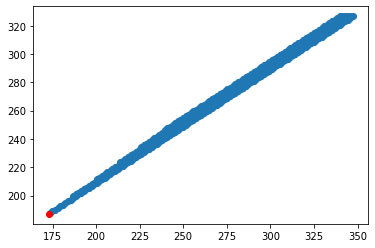

In [17]:
x2 = coefs4[1]
x4 = coefs4[3]
x5 = coefs4[4]
x6 = coefs4[5]

F1 = price
F2 = carbonates

scatter_x = []
scatter_y = []
diff = 0.05

x1 = 0

# while x1 <= 1:
while x1 <= df.loc[index[-1]].values[0]:
    x3 = 0
    while x3 <= df.loc[index[-1]].values[2]:
        x = [x1, x2, x3, x4, x5, x6]

        x3 += diff
        
        if not np.less_equal(np.dot(general_bounds, x), free_bounds).all():
            continue

        scatter_x.append(np.dot(F1, x))
        scatter_y.append(np.dot(F2, x))

    x1 += diff

plt.scatter(scatter_x, scatter_y)

# plt.scatter(
#     [np.dot(F1, coefs1), np.dot(F1, coefs2), np.dot(F1, coefs3), np.dot(F1, coefs4)],
#     [np.dot(F2, coefs1), np.dot(F2, coefs2), np.dot(F2, coefs3), np.dot(F2, coefs4)], 
#     c=['green', 'yellow', 'purple', 'red'])
plt.scatter(
    [np.dot(F1, coefs4)],
    [np.dot(F2, coefs4)], 
    c=['red'])
plt.show()